# Friends TV-Show 10 Season Transcript Exploratory Analysis

This notebook is dedicated to uncovering the distinctive features of the conversations among the characters spanning all ten seasons of the [Friends TV show (1994 - 2004)](https://www.imdb.com/title/tt0108778/).

The primary objective of this notebook is to analyze the linguistic aspects of the Friends corpus, including word usage and ngram patterns. It also aims to investigate character-specific linguistic structures and provide a quantitative assessment of character, season, and episode-related distributions of words and dialogues.

To facilitate the analysis, the notebook makes use of functions imported from the `friends_utils.py` module. In order to execute the notebook successfully, ensure that you have the raw data in CSV format and the friends_utils.py file in the same directory as the notebook.

The analysis utilizes two dataset: The first part of the analysis uses the transcripts extracted from the original DVDs. The character analysis was run using the crowd-sourced transcripts obtained from https://fangj.github.io/friends/. 

In [1]:
import sys
import numpy as np
import pandas as pd
from friends_util import *

[nltk_data] Downloading package omw-1.4 to /home/isil/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /home/isil/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/isil/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Load Data
Load the comma separated narrator, discourse, episode and season details for the Friends data obtained from the original DVDs. 

In [2]:
# load the csv file for the transcript from the original dvs
datapath= "original_friends_transcripts.csv"   


seasons, corpus, episodes, data =  load_csv_file(datapath)

print(data[:10])


                                        dialogue  season  episode
0                     THERE'S NOTHING TO TELL.         1        1
1              IT'S JUST SOME GUY I WORK WITH.         1        1
2                   YOU'RE GOING OUT WITH HIM.         1        1
3  THERE'S GOT TO BE SOMETHING WRONG WITH HIM.         1        1
4                    ALL RIGHT, JOEY, BE NICE.         1        1
5                     SO, DOES HE HAVE A HUMP?         1        1
6                      A HUMP AND A HAIRPIECE?         1        1
7                     WAIT, DOES HE EAT CHALK?         1        1
8                             I DON'T WANT HER         1        1
9                                TO GO THROUGH         1        1


# Word Characteristics

Below analysis extracts the word counts, unique words, and words with the highest frequency across the seasons. 


### Total Number of Words

In [3]:
words, unique_words = word_characteristics(data)
print(f"The total number of words in ten season of Friends is {len(words)}")
print(f"The total number of unique words in ten season of Friends is {len(unique_words)}")

The total number of words in ten season of Friends is 711496
The total number of unique words in ten season of Friends is 22951


### Distribution of Words Across Seasons

['THERE', 'S', 'NOTHING', 'TO', 'TELL', 'IT', 'S', 'JUST', 'SOME', 'GUY', 'I', 'WORK', 'WITH', 'YOU', 'RE', 'GOING', 'OUT', 'WITH', 'HIM', 'THERE', 'S', 'GOT', 'TO', 'BE', 'SOMETHING', 'WRONG', 'WITH', 'HIM', 'ALL', 'RIGHT', 'JOEY', 'BE', 'NICE', 'SO', 'DOES', 'HE', 'HAVE', 'A', 'HUMP', 'A', 'HUMP', 'AND', 'A', 'HAIRPIECE', 'WAIT', 'DOES', 'HE', 'EAT', 'CHALK', 'I', 'DON', 'T', 'WANT', 'HER', 'TO', 'GO', 'THROUGH', 'WHAT', 'I', 'WENT', 'THROUGH', 'WITH', 'CARL', 'OKAY', 'EVERYBODY', 'RELAX', 'THIS', 'IS', 'NOT', 'A', 'DATE', 'IT', 'S', 'TWO', 'PEOPLE', 'GOING', 'OUT', 'TO', 'DINNER', 'AND', 'NOT', 'HAVING', 'SEX', 'SOUNDS', 'LIKE', 'A', 'DATE', 'TO', 'ME', 'SO', 'I', 'M', 'BACK', 'IN', 'HIGH', 'SCHOOL', 'I', 'M', 'STANDING', 'IN', 'THE', 'MIDDLE', 'OF', 'THE', 'CAFETERIA', 'AND', 'I', 'REALIZE', 'I', 'AM', 'TOTALLY', 'NAKED', 'I', 'VE', 'HAD', 'THAT', 'DREAM', 'THEN', 'I', 'LOOK', 'DOWN', 'AND', 'I', 'REALIZE', 'THERE', 'IS', 'A', 'PHONE', 'THERE', 'INSTEAD', 'OF', 'THAT', 'S', 'RIGHT'

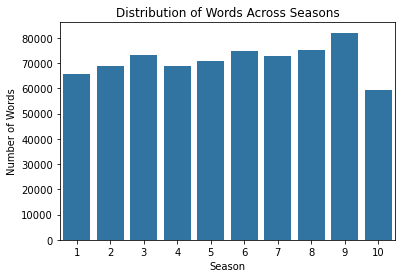

In [4]:
season_word, season_unique_word, freq_splits, unique_res, frequent_word_list, frequency_word_list, outlaws, = word_statistics(data)

season_length = len(season_word)+1

word_season_counts ={} 
for season in range(1,season_length):
  print(f"For season {season} the number of words is {len(season_word[season])}")
  word_season_counts[season] = len(season_word[season])

value = pd.DataFrame({"Season": word_season_counts.keys(), "Words": word_season_counts.values()})

plot_corpus_characteristics(value,
                           title = "Distribution of Words Across Seasons",
                           xlabel=  "Season", 
                           ylabel = "Number of Words",
                           tilt= False, type = "bar"
                           )


For season 1 the number of unique words is 4797
For season 2 the number of unique words is 4947
For season 3 the number of unique words is 5045
For season 4 the number of unique words is 4416
For season 5 the number of unique words is 4415
For season 6 the number of unique words is 4261
For season 7 the number of unique words is 4871
For season 8 the number of unique words is 5049
For season 9 the number of unique words is 5574
For season 10 the number of unique words is 4523


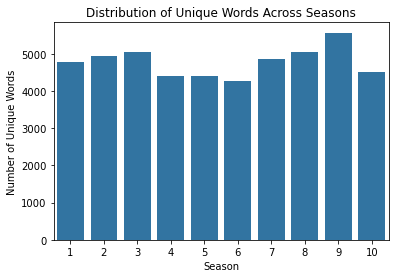

In [5]:
uniqueword_season_counts =  {}
for season in range(1,season_length):
  print(f"For season {season} the number of unique words is {len(season_unique_word[season])}")
  uniqueword_season_counts[season] = len(season_unique_word[season])

value = pd.DataFrame({"Season": uniqueword_season_counts.keys(), "Words": uniqueword_season_counts.values()})

plot_corpus_characteristics(value,
                           title = "Distribution of Unique Words Across Seasons",
                           xlabel=  "Season", 
                           ylabel = "Number of Unique Words",
                           tilt= False, type = "bar"
                           )

Let's identify the top 10 words that occur most frequently throughout the seasons. Since the text consists of dialogues among the characters, it's anticipated that personal pronouns will rank high in terms of usage, as indicated by our findings.

In [6]:
for season in range(1,season_length):
  print(f"For season {season} the top 10 most frequent words are {freq_splits[season].most_common(10)}")

For season 1 the top 10 most frequent words are [('I', 3122), ('YOU', 2949), ('S', 1612), ('THE', 1365), ('TO', 1325), ('IT', 1279), ('A', 1206), ('THAT', 986), ('AND', 929), ('T', 899)]
For season 2 the top 10 most frequent words are [('I', 3183), ('YOU', 3034), ('S', 1539), ('THE', 1499), ('TO', 1474), ('IT', 1280), ('A', 1201), ('THAT', 1035), ('AND', 966), ('T', 897)]
For season 3 the top 10 most frequent words are [('I', 3567), ('YOU', 3400), ('TO', 1754), ('S', 1685), ('THE', 1526), ('IT', 1455), ('A', 1240), ('THAT', 1169), ('AND', 1020), ('T', 1017)]
For season 4 the top 10 most frequent words are [('I', 3475), ('YOU', 3069), ('TO', 1749), ('THE', 1447), ('S', 1425), ('IT', 1373), ('A', 1212), ('THAT', 1119), ('OH', 1054), ('AND', 1003)]
For season 5 the top 10 most frequent words are [('I', 3663), ('YOU', 3285), ('TO', 1752), ('S', 1491), ('IT', 1437), ('THE', 1316), ('THAT', 1227), ('A', 1142), ('T', 995), ('OH', 948)]
For season 6 the top 10 most frequent words are [('I', 37

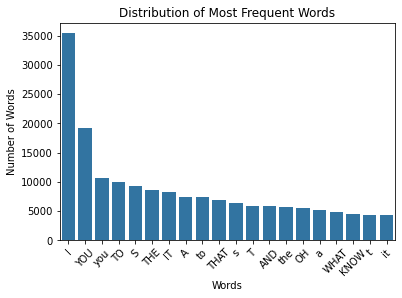

In [7]:
word_frequency = pd.DataFrame({"Words": frequent_word_list, "Frequency": frequency_word_list})
plot_corpus_characteristics(word_frequency,
                           title = "Distribution of Most Frequent Words",
                           xlabel=  "Words", 
                           ylabel = "Number of Words",
                           tilt = True, 
                           type = "bar"
                           )

### Outlaw Words

In everyday conversations, we often use words in various forms to convey our emotions, introducing intonation and prosody to infuse meaning into the text. This distinction sets spoken dialogue apart from written text. In the field of Natural Language Processing (NLP), these words are recognized based on criteria such as excessive repetition of certain vowels or consonants, or the use of non-standard English that relies on the repetition of specific sounds. Thus, "outlaw words" are identified based on these criteria.

Let's identify the outlaw words in the Friends corpus and how much of the words in a particular season is consisted of outlawed words.

In [8]:
for season in range(1,season_length):
    print(f"In season {season}, {len(outlaws[season])} strings are outlaw words, that is {len(outlaws[season])/ len(words)} of total")
    print(f"In season {season}, example of outlaw strings are {unique_res[season]}")

In season 1, 21 strings are outlaw words, that is 2.9515274857483386e-05 of total
In season 1, example of outlaw strings are ['BWAAAAA' 'HELLOOO' 'SOOO' 'MMM' 'OHHH' 'NOOOO' 'MWAAAHH' 'HELLOOOO']
In season 2, 14 strings are outlaw words, that is 1.9676849904988925e-05 of total
In season 2, example of outlaw strings are ['SEEEVER' 'MMM' 'OHHH']
In season 3, 18 strings are outlaw words, that is 2.5298807020700047e-05 of total
In season 3, example of outlaw strings are ['BZZZ' 'AHHH' 'REEE' 'MMM']
In season 4, 24 strings are outlaw words, that is 3.373174269426673e-05 of total
In season 4, example of outlaw strings are ['OOOOOOH' 'MMM']
In season 5, 23 strings are outlaw words, that is 3.232625341533895e-05 of total
In season 5, example of outlaw strings are ['AHHHH' 'MMM' 'MONNN' 'GIIIFT' 'MMMSOUP']
In season 6, 24 strings are outlaw words, that is 3.373174269426673e-05 of total
In season 6, example of outlaw strings are ['MMM' 'AHHH']
In season 7, 4 strings are outlaw words, that is 5.6

# Token Analysis


Tokens are fundamental units of text that serve as the building blocks for natural language processing tasks. They are individual words or symbols extracted from a text document. The process of tokenization involves breaking down a given text into these discrete units, which can include words, punctuation, numbers, or even subword units like word stems or characters. Tokenization is a crucial step in language processing because it enables computers to analyze and manipulate text data effectively, facilitating tasks such as text classification, language modeling, and sentiment analysis.

Different tokenization methods are available, each tailored to specific analysis goals. In this analysis, we employ the fundamental byte-pair tokenization technique provided by the `BPEmb - Byte-Pair Encoding (BPE)`` Python package. This particular method has been trained on Wikipedia data.

In [9]:
tokens_season, unique_tokens_list, tokens_norm, tokens_all, total_number_of_tokens = token_statistics(data)
print(f"The total number of tokens across all season is: {total_number_of_tokens}")

The total number of tokens across all season is: 1063767


Number of tokens in season 1 is: 98749
Number of tokens in season 2 is: 103542
Number of tokens in season 3 is: 109942
Number of tokens in season 4 is: 103060
Number of tokens in season 5 is: 107307
Number of tokens in season 6 is: 110976
Number of tokens in season 7 is: 107760
Number of tokens in season 8 is: 111709
Number of tokens in season 9 is: 121915
Number of tokens in season 10 is: 88807


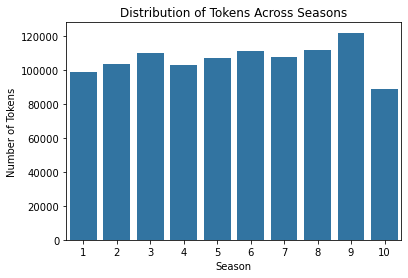

In [10]:
token_season_counts = {}


for season in range(1,season_length):
    print("Number of tokens in season {} is: {}".format(season, len(tokens_season[season])))
    token_season_counts[season] = len(tokens_season[season])

value = pd.DataFrame({"Season": token_season_counts.keys(), "Words": token_season_counts.values()})

plot_corpus_characteristics(value,
                           title = "Distribution of Tokens Across Seasons",
                           xlabel=  "Season", 
                           ylabel = "Number of Tokens",
                           tilt= False, type = "bar"
                           )
    

The total number of unique tokens across all season is: 3714
The total number of unique tokens across all season is: 3673
The total number of unique tokens across all season is: 3794
The total number of unique tokens across all season is: 3465
The total number of unique tokens across all season is: 3431
The total number of unique tokens across all season is: 3453
The total number of unique tokens across all season is: 3668
The total number of unique tokens across all season is: 3676
The total number of unique tokens across all season is: 3980
The total number of unique tokens across all season is: 3434


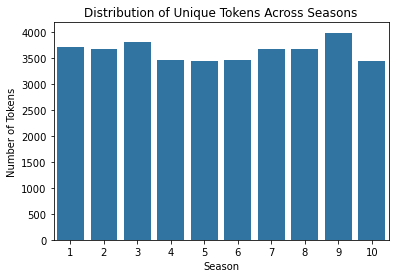

In [11]:
uniquetoken_season_counts = {}
for season in range(1,season_length):
    print(f"The total number of unique tokens across all season is: {len(unique_tokens_list[season])}")
    uniquetoken_season_counts[season] = len(unique_tokens_list[season])

value = pd.DataFrame({"Season": uniquetoken_season_counts.keys(), "Words": uniquetoken_season_counts.values()})

plot_corpus_characteristics(value,
                           title = "Distribution of Unique Tokens Across Seasons",
                           xlabel=  "Season", 
                           ylabel = "Number of Tokens",
                           tilt= False, type = "bar"
                           )
    
    

In [12]:
for season in range(1,3):
  print(f"The 50 tokens in first 3 season are {tokens_season[season][:50]}")
  print(f"The 50 lemmatized tokens in first 3  season are {tokens_norm[season][:50]}")
  print(f"The 50 unique tokens in first 3  season are {unique_tokens_list[season][:50]}")


The 50 tokens in first 3 season are ['▁there', "'", 's', '▁nothing', '▁to', '▁tell', '.', '▁it', "'", 's', '▁just', '▁some', '▁guy', '▁i', '▁work', '▁with', '.', '▁you', "'", 're', '▁going', '▁out', '▁with', '▁him', '.', '▁there', "'", 's', '▁got', '▁to', '▁be', '▁something', '▁wrong', '▁with', '▁him', '.', '▁all', '▁right', ',', '▁jo', 'ey', ',', '▁be', '▁n', 'ice', '.', '▁so', ',', '▁does', '▁he']
The 50 lemmatized tokens in first 3  season are ['▁there', "'", 's', '▁nothing', '▁to', '▁tell', '.', '▁it', "'", 's', '▁just', '▁some', '▁guy', '▁i', '▁work', '▁with', '.', '▁you', "'", 're', '▁going', '▁out', '▁with', '▁him', '.', '▁there', "'", 's', '▁got', '▁to', '▁be', '▁something', '▁wrong', '▁with', '▁him', '.', '▁all', '▁right', ',', '▁jo', 'ey', ',', '▁be', '▁n', 'ice', '.', '▁so', ',', '▁does', '▁he']
The 50 unique tokens in first 3  season are ['▁hope', '▁ferry', 'ries', '▁di', 'ix', '▁announced', '▁rece', 'front', '▁tan', '▁possible', 'three', '▁pole', '▁tool', 'osexual', '.,', 

In [13]:
# Create list of token lengths for each token
for season in range(1,season_length):
  token_length = [len(t) for t in tokens_season[season]]
  print(f"Average number of characters per token in season {season} is: {round(np.mean(token_length),4)}")

Average number of characters per token in season 1 is: 3.2147
Average number of characters per token in season 2 is: 3.2042
Average number of characters per token in season 3 is: 3.2173
Average number of characters per token in season 4 is: 3.2178
Average number of characters per token in season 5 is: 3.1898
Average number of characters per token in season 6 is: 3.2428
Average number of characters per token in season 7 is: 3.2532
Average number of characters per token in season 8 is: 3.2149
Average number of characters per token in season 9 is: 3.2444
Average number of characters per token in season 10 is: 3.2262


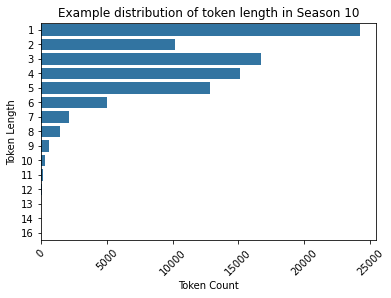

In [14]:
token_length = [len(t) for t in tokens_season[10]]

plot_corpus_characteristics(token_length,
                           title = "Example distribution of token length in Season 10",
                           xlabel=  "Token Count", 
                           ylabel = "Token Length",
                           tilt = True, type= "count"
                           )

### Long tokens
Identifying words with a long number of characters in token analysis can be important for several reasons, primarily because they may indicate complex or domain-specific terminology, which can be crucial for specialized text processing tasks or domain-specific language models. Additionally, long words might have a different impact on language models, and their analysis can provide insights into vocabulary richness and text complexity.

Particularly, these lengthy words could also reference invented components or common cultural expressions. To pinpoint these attributes in the data, let's identify words with more than 10 characters.

In [15]:
# Example distribution of token character length higher than 10 characters for Season 10.
pd.DataFrame(data=token_length, columns=['length']).query("length>10").value_counts()

length
11        119
12         45
13         13
14          3
16          1
Name: count, dtype: int64

Lets find out the rare tokens which has a token length longer than 15 characters. During preprocessing, finding and removing meaningless tokens among these rare tokens is considered as a good practice to avoid having them in the token vectors.

In [16]:
for season in range(1,season_length):
  print([t for t in  tokens_season[season] if len(t)>=15])


['▁responsibility', '▁responsibility']
['▁responsibility', '▁responsibility']
['▁responsibility', '▁representation']
['▁responsibility', '▁responsibility', '▁responsibility', '▁responsibility', '▁responsibility', '▁transportation', '▁responsibility']
[]
['▁responsibility', '▁responsibility', '▁responsibility']
['▁responsibility', '▁representative', '▁transportation', '▁responsibility']
[]
['▁responsibility', '▁responsibility', '▁responsibility', '▁responsibility', '▁responsibility']
['▁internationally']


# Stop Words 

Stop word identification is crucial in text analysis as it allows for the removal of common, non-contextual words like "and," "the," and "in." 

This process helps improve the efficiency and accuracy of natural language processing tasks by focusing on meaningful content words, reducing noise, and enhancing the understanding of the text's underlying context. 

To identify the stop word characteristics of the Friends corpus we use stop words from `nltk` Python library. 

In [17]:
stop_words, freq_stopwords= stopword_statistics(tokens_norm)

print(f"There are {len(stop_words)} stopwords in NLTK library.\n")
print(f"The example stop words in NLTK library are:", stop_words)


There are 179 stopwords in NLTK library.

The example stop words in NLTK library are: {'then', 'after', "needn't", 'they', 'who', 'for', 'he', 'into', 'ourselves', 'their', 'such', 'too', 'out', 'those', 'were', 'over', 'had', 'until', 'just', 'did', 'below', 'by', 'above', 'further', 'hers', 'ours', "you'd", "you've", 'yourselves', 'or', 'here', 'i', 'don', 'when', 'all', 'than', 'whom', 'very', 'have', 've', 'if', 'hadn', 'can', 'weren', 'should', 'no', 'themselves', 'wasn', 'couldn', "you're", 'we', 'these', 'myself', 'was', 'ma', 'needn', 'am', 'doing', 'this', 'a', "should've", 'now', 'so', 'at', 'as', 'herself', 'be', 'while', 'own', "haven't", 'are', 're', 'more', 'because', "it's", "wouldn't", 'y', 'some', 'you', 'through', 'ain', "mustn't", "wasn't", "weren't", "hasn't", "that'll", 'has', 'been', 'mightn', 'shouldn', 'o', "shouldn't", 'she', 'before', "mightn't", 'to', "shan't", "she's", 'not', 'which', 'under', 'off', 'of', 'your', 'her', "won't", 'why', 's', 'will', 'once', 

Stop words can be expanded according to the text's structure. Let's identify which words frequently appear in Friends transcripts, aside from the `nltk` stopwords, that could potentially be considered for inclusion in the stop words list.

In [18]:
print("The top ten frequent stopwords of season {} are".format(season))
print(freq_stopwords[:10])

The top ten frequent stopwords of season 10 are
[('s', 1438), ('t', 900), ('m', 552), ('y', 484), ('re', 456), ('be', 223), ('ll', 179), ('i', 144), ('ve', 115), ('ma', 104)]


Let's find out what is the proportion of the stopwords in Friends corpus per season.

In [19]:
for season in range(1,season_length):
  n_stopwords = len([t for t in tokens_norm[season] if t in stop_words])
  print(f"{n_stopwords} tokens are stop words out of {len(tokens_norm[season])} tokens in season {season}.")
  print(f"That is {round(100*n_stopwords/len(tokens_norm[season]),2)}%.")

5861 tokens are stop words out of 98749 tokens in season 1.
That is 5.94%.
5939 tokens are stop words out of 103542 tokens in season 2.
That is 5.74%.
6310 tokens are stop words out of 109942 tokens in season 3.
That is 5.74%.
5716 tokens are stop words out of 103060 tokens in season 4.
That is 5.55%.
5932 tokens are stop words out of 107307 tokens in season 5.
That is 5.53%.
6230 tokens are stop words out of 110976 tokens in season 6.
That is 5.61%.
6239 tokens are stop words out of 107760 tokens in season 7.
That is 5.79%.
6748 tokens are stop words out of 111709 tokens in season 8.
That is 6.04%.
7162 tokens are stop words out of 121915 tokens in season 9.
That is 5.87%.
5274 tokens are stop words out of 88807 tokens in season 10.
That is 5.94%.


Let's investigate the impact on the total token count in Friends corpus when we remove the stop words from the text.

In [20]:
# first clean stop words
tokens_clean = {}
for season in range(1,season_length):
  tokens_clean[season] = [t for t in tokens_norm[season] if t not in stop_words]
  print(f"Number of tokens for season {season} is: {len(tokens_clean[season])}")

Number of tokens for season 1 is: 92888
Number of tokens for season 2 is: 97603
Number of tokens for season 3 is: 103632
Number of tokens for season 4 is: 97344
Number of tokens for season 5 is: 101375
Number of tokens for season 6 is: 104746
Number of tokens for season 7 is: 101521
Number of tokens for season 8 is: 104961
Number of tokens for season 9 is: 114753
Number of tokens for season 10 is: 83533


# Common n-grams

N-grams constitute simple but yet crucial functionality in processing natural language. It allows models to better capture the contextual information from the text, by helping the model to perform better. 

That is why understanding the n-gram characteristics of Friends text maintains an essential gain in  understanding their role in the model performance. Then let's investigate what are the n-gram properties in the Friends corpus. 

Our analysis showcase that discourse markers or filler words in English like "oh," "yeah," "right," and "well" constitute the biggest chunk of the unigrams, while phrases like "come on", "no no", "I am going to" appears mant more times in the context.

<Figure size 432x288 with 0 Axes>

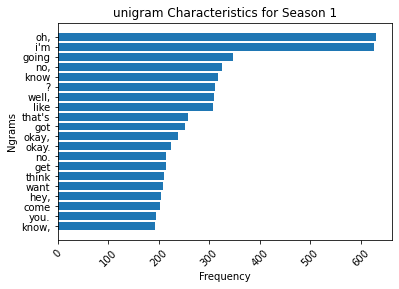

<Figure size 432x288 with 0 Axes>

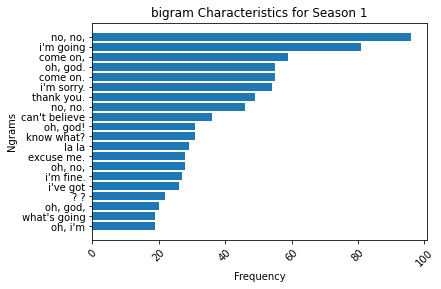

<Figure size 432x288 with 0 Axes>

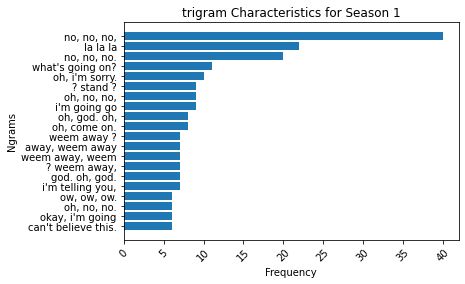

<Figure size 432x288 with 0 Axes>

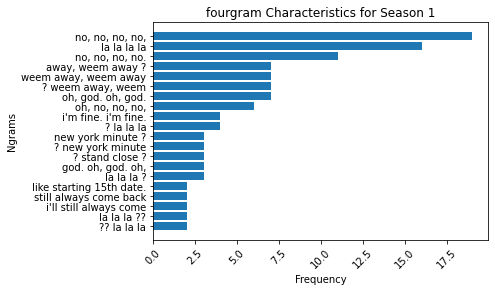

<Figure size 432x288 with 0 Axes>

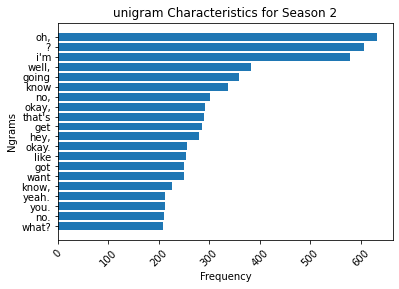

<Figure size 432x288 with 0 Axes>

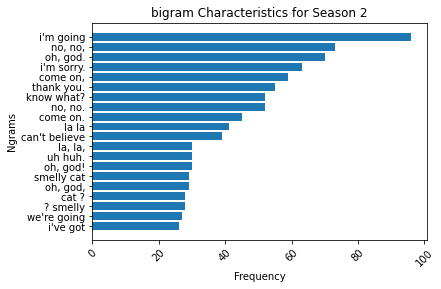

<Figure size 432x288 with 0 Axes>

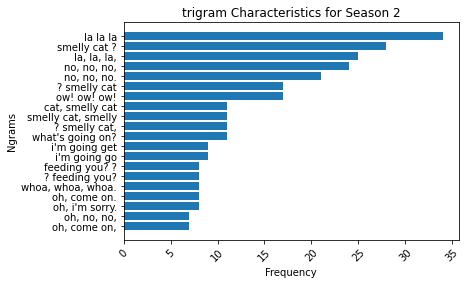

<Figure size 432x288 with 0 Axes>

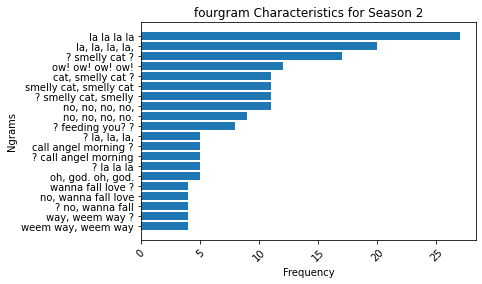

<Figure size 432x288 with 0 Axes>

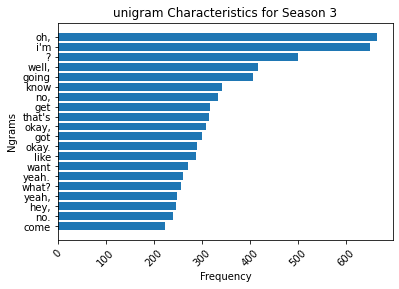

<Figure size 432x288 with 0 Axes>

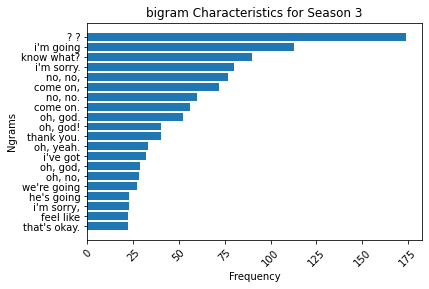

<Figure size 432x288 with 0 Axes>

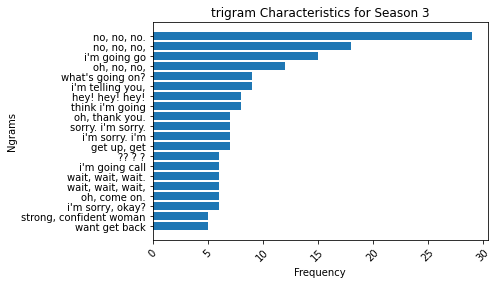

<Figure size 432x288 with 0 Axes>

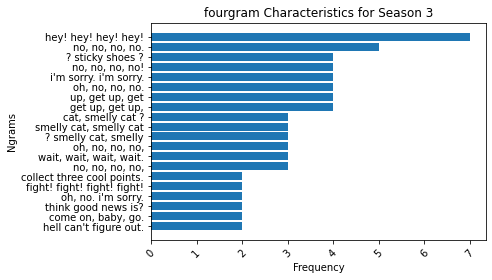

<Figure size 432x288 with 0 Axes>

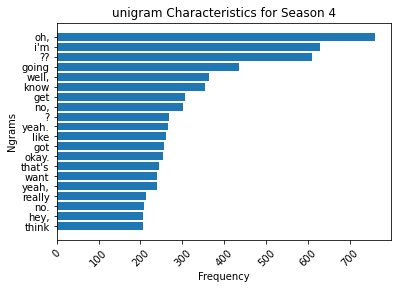

<Figure size 432x288 with 0 Axes>

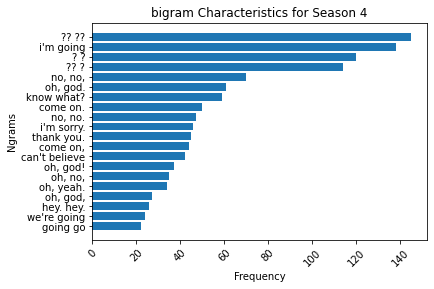

<Figure size 432x288 with 0 Axes>

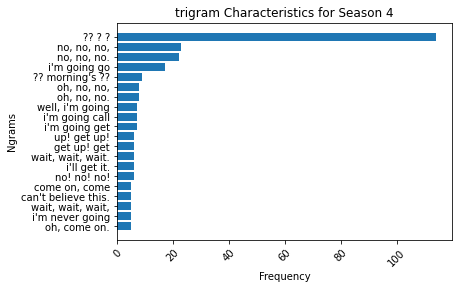

<Figure size 432x288 with 0 Axes>

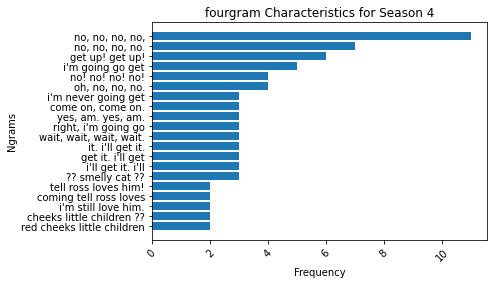

<Figure size 432x288 with 0 Axes>

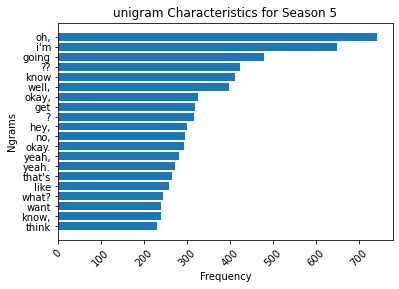

<Figure size 432x288 with 0 Axes>

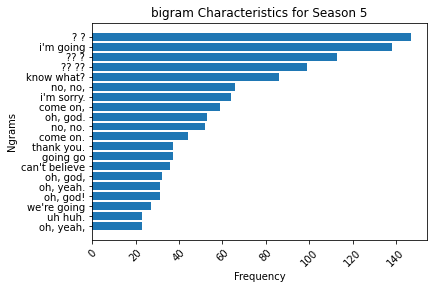

<Figure size 432x288 with 0 Axes>

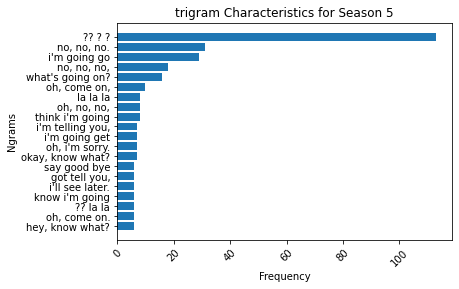

<Figure size 432x288 with 0 Axes>

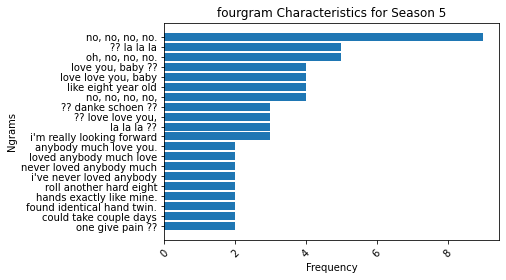

<Figure size 432x288 with 0 Axes>

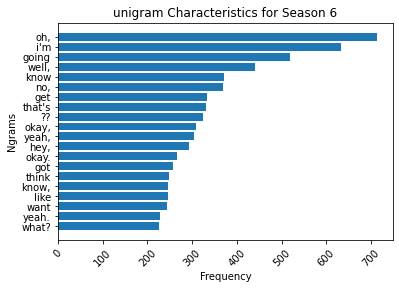

<Figure size 432x288 with 0 Axes>

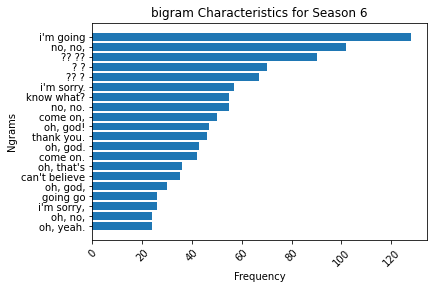

<Figure size 432x288 with 0 Axes>

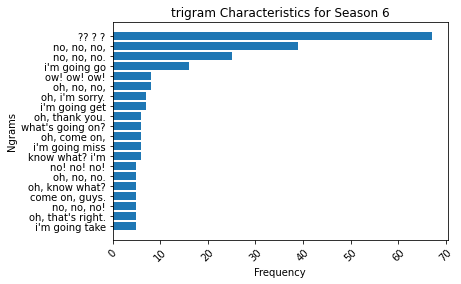

<Figure size 432x288 with 0 Axes>

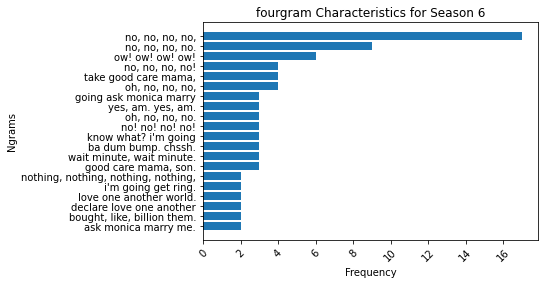

<Figure size 432x288 with 0 Axes>

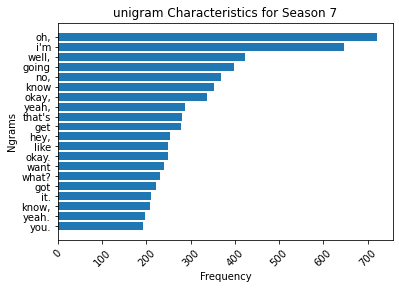

<Figure size 432x288 with 0 Axes>

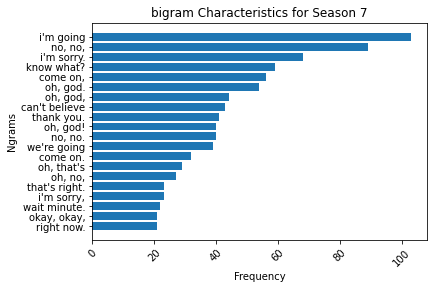

<Figure size 432x288 with 0 Axes>

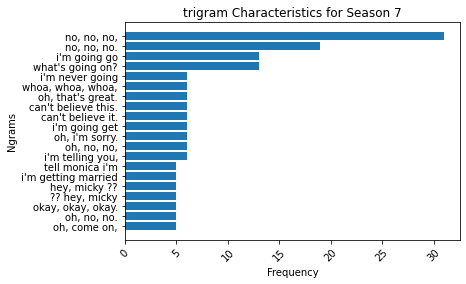

<Figure size 432x288 with 0 Axes>

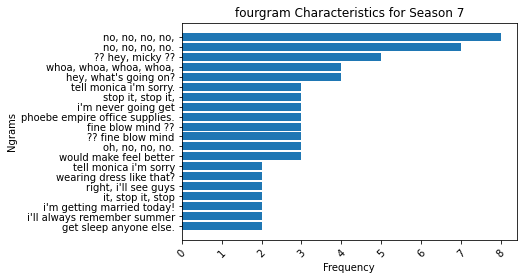

<Figure size 432x288 with 0 Axes>

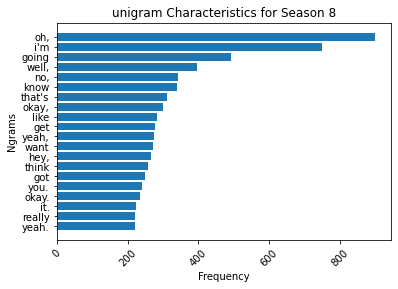

<Figure size 432x288 with 0 Axes>

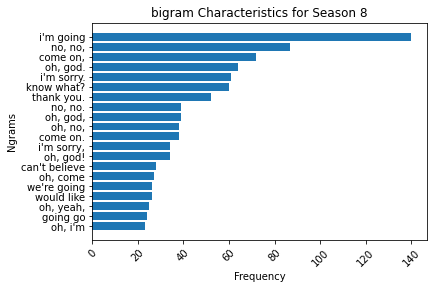

<Figure size 432x288 with 0 Axes>

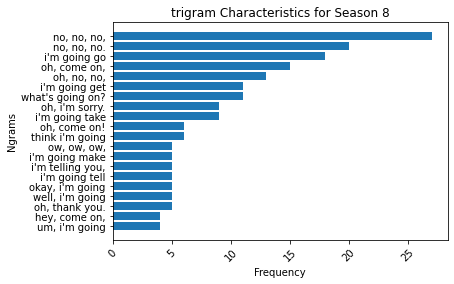

<Figure size 432x288 with 0 Axes>

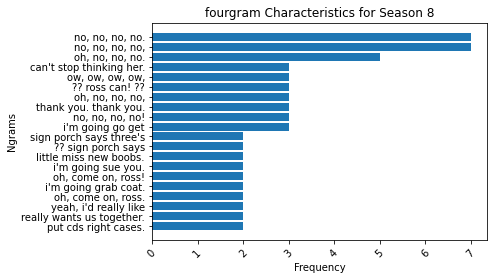

<Figure size 432x288 with 0 Axes>

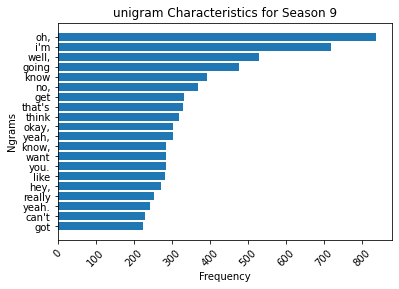

<Figure size 432x288 with 0 Axes>

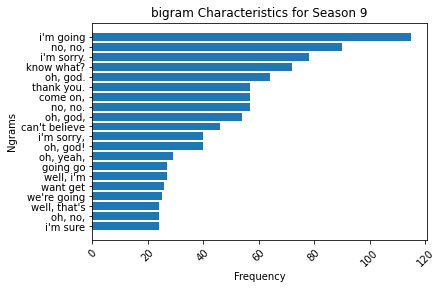

<Figure size 432x288 with 0 Axes>

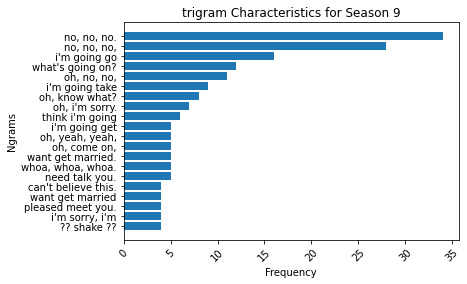

<Figure size 432x288 with 0 Axes>

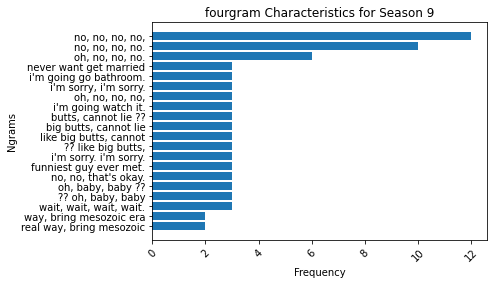

<Figure size 432x288 with 0 Axes>

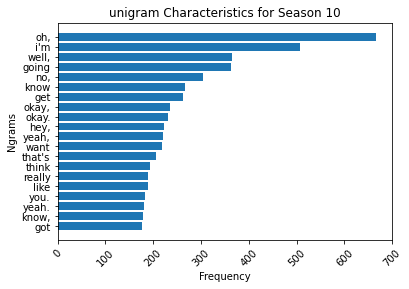

<Figure size 432x288 with 0 Axes>

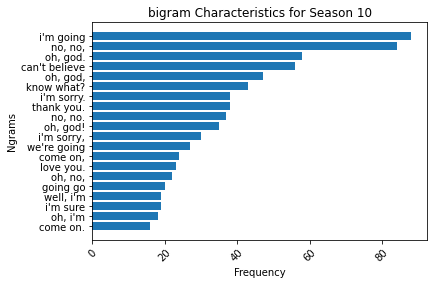

<Figure size 432x288 with 0 Axes>

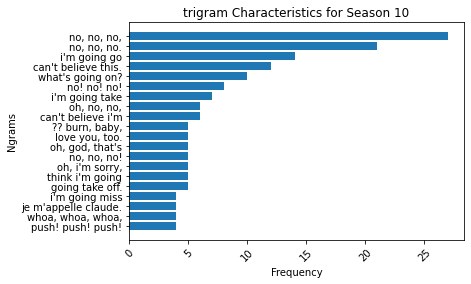

<Figure size 432x288 with 0 Axes>

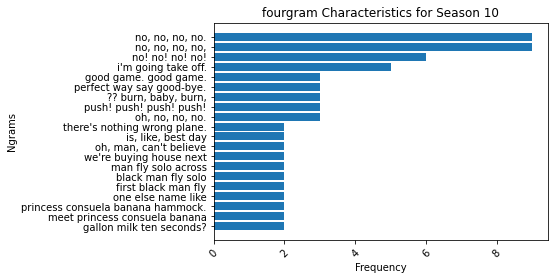

In [21]:
mapping = {1:"uni", 2:"bi", 3:"tri", 4:"four"}

for season in range(1,season_length): 
    rslt_df = data[data['season'] == season]
    for ngram in range(1,5):
        ans_bigram = generate_ngrams(rslt_df["dialogue"], ngram, 20, stop_words)
        plot_corpus_characteristics(ans_bigram,
                           title = f"{mapping[ngram]}gram Characteristics for Season {season}",
                           xlabel=  "Frequency", 
                           ylabel = "Ngrams",
                           tilt = True, 
                           type = "ngram"
                        )

# The number of Utterances

Given the data contains the dialouge based text utterances in a dialogue differ from sentences in that they are individual spoken expressions within a conversation, often characterized by less formal structure and context-dependent meaning. 

Unlike sentences, utterances may be fragmented or incomplete, relying on the context and conversational flow for comprehension.

Here we investigate the number of utterances across the seasons and episodes between the characters. 

In [22]:
print("The total number of utterances in ten season of Friends is {}".format(len(corpus)))


The total number of utterances in ten season of Friends is 128698


### Utterances per Season

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])


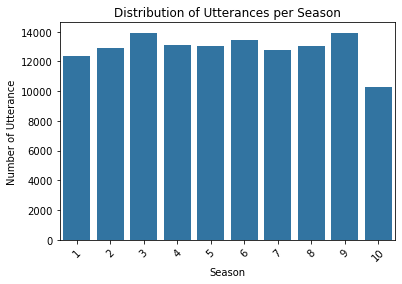

In [23]:
countS = Counter(seasons)


print(countS.keys())

utterances_per_season = pd.DataFrame({"Season": countS.keys(), "Unique_words": countS.values()})

plot_corpus_characteristics(utterances_per_season,
                           title = "Distribution of Utterances per Season",
                           xlabel=  "Season", 
                           ylabel = "Number of Utterance",
                           tilt = True, 
                           type = "bar"
)

### Utterances per Episode


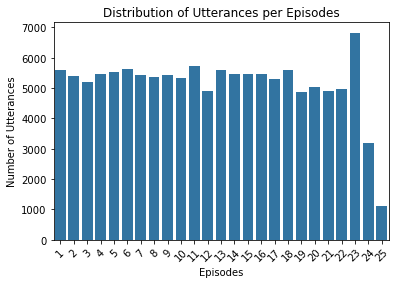

In [24]:
#Dialogues per episode
countE = Counter(episodes)
utterances_per_episode = pd.DataFrame({"Episode": countE.keys(), "Unique_words": countE.values()})

plot_corpus_characteristics(utterances_per_episode,
                           title = "Distribution of Utterances per Episodes",
                           xlabel=  "Episodes", 
                           ylabel = "Number of Utterances",
                           tilt = True, 
                           type = "bar"
)

# Character Analysis 

The analysis was conducted using a collection of Friends transcripts sourced from a GitHub repository(https://fangj.github.io/friends/). These transcripts exhibit structural variations when compared to those obtained directly from the original DVDs, and there may be slight differences in the dialogue between the characters. Nevertheless, we utilize this dataset for character-specific analysis because the transcripts derived from the original DVDs lack a narrator indicator within the dialogue.

In [25]:
# load the crowd-sourced transcript files
datapath = "crowd_sourced_friends_transcripts.csv"

seasons, corpus, episodes, narrator, data= load_csv_file(datapath)

count = Counter(narrator)
print("{} characters took part in Friends across 10 Seasons. Which can be listed as:".format(len(count.keys())))

print()

print(narrator.unique())

359 characters took part in Friends across 10 Seasons. Which can be listed as:

['Monica' 'Joey' 'Chandler' 'Phoebe' 'All' 'Ross' 'Rachel' 'Waitress'
 'Paul' 'Frannie' 'Customer' 'Marsha' 'Carol' 'Susan' 'Barry' 'Robbie'
 'Bernice' 'Paula' 'Alan' 'Lizzie' 'Guys' 'Leslie' 'Kiki' 'Joanne'
 'Receptionist' 'Both' 'Kid' 'Angela' 'Janice' 'Woman' 'Bob' 'Aurora'
 'Director' 'Jill' 'Paolo' 'Shelley' 'Nurse' 'Andrea' 'Lowell' 'Terry'
 'Guy' 'Girl' 'Max' 'David' 'Sandy' 'Girls' 'Roger' 'Ronni' 'Lorraine'
 'Kristin' 'Celia' 'Steve' 'Ursula' 'Teacher' 'Helen' 'Nina' 'Jamie'
 'Fran' 'Intercom' 'Luisa' 'Bobby' 'Mindy' 'Danielle' 'Pa' 'Actor'
 'Gerston' 'Santos' 'Petrie' 'Lydia' 'Janitor' 'Melanie' 'Man' 'Carl'
 'Julie' 'Paulo' 'Frankie' 'Annabelle' 'Alison' 'Stranger' 'Duncan'
 'Rahcel' 'Jade' 'Waiter' 'Machine' 'Caroline' 'Boys' 'Doctor' 'Stephanie'
 'Together' 'Chan' 'Rach' 'Phoe' 'Mnca' 'Mich' 'Rtst' 'Radio' 'Gunther'
 'Gang' 'Grandmother' 'Fbob' 'Russ' 'Estl' 'Minister' 'Rob' 'Erica'
 'Lipson' '

In [26]:
# Top 10 narrators with the highest diaglouge
narrator_count, sorted_narrator_count, character_dialogues = character_dialog_counts(narrator)
print("The characters had higest number of dialogues in ascending order is:")
print()

print(sorted_narrator_count)


The characters had higest number of dialogues in ascending order is:

[('Janice', 217), ('Richard', 245), ('All', 338), ('Mike', 359), ('Phoebe', 7353), ('Joey', 8139), ('Monica', 8235), ('Chandler', 8320), ('Ross', 9011), ('Rachel', 9073)]


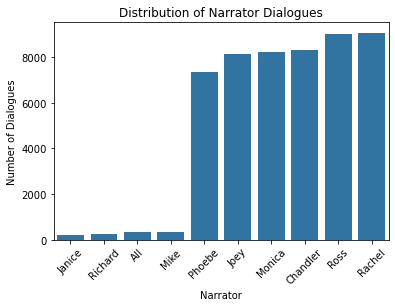

In [27]:
utterances_per_season_by_character= pd.DataFrame({"Narrators": character_dialogues.keys(), "Narrator_dialogues": character_dialogues.values()})


plot_corpus_characteristics(utterances_per_season_by_character,
                           title = "Distribution of Narrator Dialogues",
                           xlabel=  "Narrator", 
                           ylabel = "Number of Dialogues",
                           tilt = True, 
                           type = "bar"
)

###  Number of Narrators per season

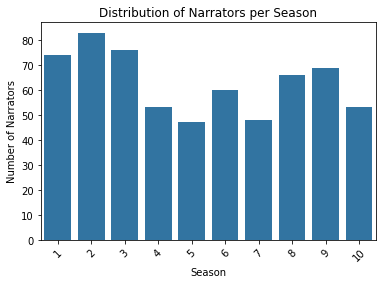

In [28]:
# Number of characters per season

season_narrator = {}
for season in range(1,season_length):
    rslt_df = data[data['season'] == season]
    season_narrator[season]= rslt_df.narrator.unique().size

narrator_per_season = pd.DataFrame({"Season": season_narrator.keys(), "Narrator_dialogues": season_narrator.values()})


plot_corpus_characteristics(narrator_per_season,
                           title = "Distribution of Narrators per Season",
                           xlabel=  "Season", 
                           ylabel = "Number of Narrators",
                           tilt = True, 
                           type = "bar"
)